In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import math
import numpy as np

In [129]:
df = pd.read_csv("data/data.csv")

In [130]:
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [131]:
r_cols = ["R_Height_cms","R_Reach_cms","R_Weight_lbs"]
b_cols = ["B_Height_cms","B_Reach_cms","B_Weight_lbs"]
header = ["Height","Reach","Weight"]

In [132]:
R_heights_to_reach = df[r_cols]
R_heights_to_reach.columns = header
B_heights_to_reach = df[b_cols]
B_heights_to_reach.columns = header


In [133]:
MasterHR = R_heights_to_reach.append(B_heights_to_reach,ignore_index=True)

In [134]:
MasterHR.shape

(10288, 3)

In [135]:
MasterHR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10288 entries, 0 to 10287
Data columns (total 3 columns):
Height    10276 non-null float64
Reach     9306 non-null float64
Weight    10279 non-null float64
dtypes: float64(3)
memory usage: 241.2 KB


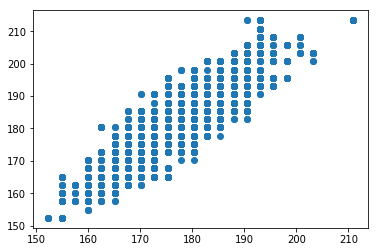

In [136]:
plt.scatter(MasterHR["Height"],MasterHR["Reach"])

In [137]:
trainer = MasterHR.dropna()
trainer.shape

(9304, 3)

In [162]:

X = np.array(list(trainer["Height"]))
y = np.array(list(trainer["Reach"]))

X = X.reshape(len(trainer),1)
y = y.reshape(len(trainer),1)

In [187]:
lr = LinearRegression().fit(X,y)
nay =KNeighborsRegressor(n_neighbors=3).fit(X,y)


In [188]:
MasterHR.shape
MasterHR = MasterHR.fillna(0)

In [189]:
MasterHR["LR_Reach"] = MasterHR.apply(lambda x: lr.predict(np.array(x["Height"]).reshape(1,1))[0][0] if x["Reach"] == 0 else x["Reach"],axis=1)

In [190]:
MasterHR["KNN_Reach"] = MasterHR.apply(lambda x: nay.predict(np.array(x["Height"]).reshape(1,1))[0][0] if x["Reach"] == 0 else x["Reach"],axis=1)

In [191]:
MasterHR["KNN_Reach"]

0        162.560000
1        167.640000
2        193.040000
3        172.720000
4        190.500000
5        167.640000
6        180.340000
7        162.560000
8        180.340000
9        160.020000
10       200.660000
11       175.260000
12       172.720000
13       200.660000
14       200.660000
15       182.880000
16       177.800000
17       175.260000
18       182.880000
19       177.800000
20       177.800000
21       167.640000
22       187.960000
23       193.040000
24       195.580000
25       177.800000
26       200.660000
27       182.880000
28       190.500000
29       187.960000
            ...    
10258    192.193333
10259    193.886667
10260    152.400000
10261    194.733333
10262    180.340000
10263    189.653333
10264    202.353333
10265    193.886667
10266    194.733333
10267    189.653333
10268    188.806667
10269    179.493333
10270    189.653333
10271    179.493333
10272    181.186667
10273    189.653333
10274    179.493333
10275    193.886667
10276    194.733333


In [192]:
MasterHR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10288 entries, 0 to 10287
Data columns (total 5 columns):
Height       10288 non-null float64
Reach        10288 non-null float64
Weight       10288 non-null float64
KNN_Reach    10288 non-null float64
LR_Reach     10288 non-null float64
dtypes: float64(5)
memory usage: 402.0 KB
